# Deep Neural Network Implementation

- Initialization
- Cost Computation
- Forward Propagation
- Backward Propagation
- Model creation
- Update parameters
- Prediction
- Gradient Checking

### Import required packages

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import h5py
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

np.random.seed(1)

In [35]:
def initialize_params(layer_dims):
    np.random.seed(1)
    parameters = {}
    l = len(layer_dims)
    
    for i in range(1,l):
        parameters['W' + str(i)] = np.random.randn(layer_dims[i],layer_dims[i-1])/np.sqrt(layer_dims[i-1]) #*0.01
        parameters['b' + str(i)] = np.zeros((layer_dims[i],1))
        
        assert(parameters['W' + str(i)].shape == (layer_dims[i],layer_dims[i-1]))
        assert(parameters['b' + str(i)].shape == (layer_dims[i],1))
    
    return parameters
        
def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [36]:
# Check the functionality of the above function
params = initialize_params([3,2,1])
print('W1' + str(params['W1']))
print('b1' + str(params['b1']))

W1[[ 0.93781623 -0.35319773 -0.3049401 ]
 [-0.61947872  0.49964333 -1.32879399]]
b1[[ 0.]
 [ 0.]]


## Forward Propagation Module

### Sigmoid Function

In [37]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

### ReLU Function

In [38]:
def relu(z):
    return (z + np.absolute(z))/2

## Forward Prop function

In [39]:
def forward_propagation(A_prev,W,b,activation):
    Z = np.dot(W,A_prev) + b

    if activation == 'sigmoid':
        A = sigmoid(Z)
    elif activation == 'relu':
        A = relu(Z)
    elif activation == 'tanh':
        A = np.tanh(Z)
        
    assert(A.shape == (W.shape[0],A_prev.shape[1]))
    
    cache = (Z,A_prev,W,b)
    
    return A,cache
        

In [40]:
# Check the functionality of the above function
A_prev = np.array([[-0.41675785,-0.05626683],[-2.1361961,1.64027081],[-1.79343559,-0.84174737]])
W = np.array([[ 0.50288142,-1.24528809,-1.05795222]])
b = np.array([[-0.90900761]])

A, linear_activation_cache = forward_propagation(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = forward_propagation(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[ 0.96890023  0.11013289]]
With ReLU: A = [[ 3.43896134  0.        ]]


**Expected output**:
       
<table style="width:35%">
  <tr>
    <td> **With sigmoid: A ** </td>
    <td > [[ 0.96890023  0.11013289]]</td> 
  </tr>
  <tr>
    <td> **With ReLU: A ** </td>
    <td > [[ 3.43896131  0.        ]]</td> 
  </tr>
</table>

In [41]:
def model_forward(X,parameters):
    
    L = len(parameters)//2
    A = X
    caches = []
    
    for l in range(1,L):
        A_prev = A
        A,cache = forward_propagation(A_prev,parameters['W'+str(l)],parameters['b' + str(l)],'relu')
        caches.append(cache)
    
    AL, cache = forward_propagation(A,parameters['W' + str(L)],parameters['b' + str(L)],'sigmoid')
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
    
    return AL, caches
        

In [42]:
# Check the functionality of the above function
X = np.array([[-0.31178367,0.72900392,0.21782079,-0.8990918 ],[-2.48678065, 0.91325152,1.12706373,-1.51409323],[ 1.63929108,-0.4298936,2.63128056,0.60182225],[-0.33588161,1.23773784,0.11112817,0.12915125],[ 0.07612761,-0.15512816,0.63422534 ,0.810655]])
parameters = {'W3': np.array([[ 0.9398248 ,  0.42628539, -0.75815703]]), 'b3': np.array([[-0.16236698]]), 'W1': np.array([[ 0.35480861,  1.81259031, -1.3564758 , -0.46363197,  0.82465384],
       [-1.17643148,  1.56448966,  0.71270509, -0.1810066 ,  0.53419953],
       [-0.58661296, -1.48185327,  0.85724762,  0.94309899,  0.11444143],
       [-0.02195668, -2.12714455, -0.83440747, -0.46550831,  0.23371059]]), 'b1': np.array([[ 1.38503523],
       [-0.51962709],
       [-0.78015214],
       [ 0.95560959]]), 'b2': np.array([[ 1.50278553],
       [-0.59545972],
       [ 0.52834106]]), 'W2': np.array([[-0.12673638, -1.36861282,  1.21848065, -0.85750144],
       [-0.56147088, -1.0335199 ,  0.35877096,  1.07368134],
       [-0.37550472,  0.39636757, -0.47144628,  2.33660781]])}

AL, caches = model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))
# print(parameters['W3'])

AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]
Length of caches list = 3


<table style="width:50%">
  <tr>
    <td> **AL** </td>
    <td > [[ 0.03921668  0.70498921  0.19734387  0.04728177]]</td> 
  </tr>
  <tr>
    <td> **Length of caches list ** </td>
    <td > 3 </td> 
  </tr>
</table>

## Cost Function

In [43]:
def compute_cost(AL,Y):
    m = Y.shape[1]
    
    cost = -1/m*np.sum((np.multiply(Y,np.log(AL)) + np.multiply(1-Y,np.log(1-AL))))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost


In [44]:
# Check the functionality of the above function
Y = np.array([[1,1,1]])
AL = np.array([[ 0.8,0.9,0.4]])

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615


**Expected Output**:

<table>

    <tr>
    <td>**cost** </td>
    <td> 0.41493159961539694</td> 
    </tr>
</table>

## Back Propagation Module

In [45]:
def relu_backward(dA,Z):
    
    def relu_der(x):
        k = np.copy(x)
        np.putmask(k,k>=0,1)
        np.putmask(k,k<0,0)
        return k
    
    return np.multiply(dA,relu_der(Z))
def sigmoid_backward(dA,Z):
    
    def sigmoid_der(x):
        der = np.exp(-x)/(1+np.exp(-x))**2
        return der
    
    return np.multiply(dA,sigmoid_der(Z))

In [46]:
def linear_backward(dZ,cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = 1/m*(np.dot(dZ,A_prev.T))
    db = 1/m*np.sum(dZ,axis=1,keepdims=True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [47]:
# Check the functionality of the above function
dZ = np.array([[1.62434536,-0.61175641]])
linear_cache = (np.array([[-0.52817175, -1.07296862],[ 0.86540763, -2.3015387 ],[ 1.74481176, -0.7612069 ]]),np.array([[ 0.3190391 , -0.24937038,  1.46210794]]),np.array([[-2.06014071]]))

dA_prev, dW, db = linear_backward(dZ, linear_cache)

print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506362  0.15255393]
 [ 2.37496825 -0.8944539 ]]
dW = [[-0.10076895  1.40685096  1.64992504]]
db = [[ 0.50629448]]


**Expected Output**: 

<table style="width:90%">
  <tr>
    <td> **dA_prev** </td>
    <td > [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]] </td> 
  </tr> 
  
    <tr>
        <td> **dW** </td>
        <td > [[-0.10076895  1.40685096  1.64992505]] </td> 
    </tr> 
  
    <tr>
        <td> **db** </td>
        <td> [[ 0.50629448]] </td> 
    </tr> 
    
</table>



In [48]:
def linear_activation_backward(dA, cache, activation):
    
    Z, A_prev, W, b = cache
#     A_prev, W, b, Z = cache
    small_cache = (A_prev,W,b)
    
    if activation == 'relu':
        dZ = relu_backward(dA,Z)
        dA_prev, dW, db = linear_backward(dZ,small_cache)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA,Z)
        dA_prev, dW, db = linear_backward(dZ,small_cache)
        
    return dA_prev, dW, db

In [49]:
# Check the functionality of the above function
linear_activation_cache = (np.array([[ 0.04153939, -1.11792545]]),np.array([[-2.1361961,1.64027081],[-1.79343559, -0.84174737],[ 0.50288142, -1.24528809]]),np.array([[-1.05795222, -0.90900761,  0.55145404]]),np.array([[ 2.29220801]]))
AL = np.array([[-0.41675785,-0.05626683]])

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.0110534 ]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576155]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228  -0.        ]]
dW = [[ 0.44513825  0.37371418 -0.10478989]]
db = [[-0.20837892]]


**Expected output with sigmoid:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td >[[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]] </td> 

  </tr> 
  
    <tr>
    <td > dW </td> 
           <td > [[ 0.10266786  0.09778551 -0.01968084]] </td> 
  </tr> 
  
    <tr>
    <td > db </td> 
           <td > [[-0.05729622]] </td> 
  </tr> 
</table>



**Expected output with relu:**

<table style="width:100%">
  <tr>
    <td > dA_prev </td> 
           <td > [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]] </td> 

  </tr> 
  
    <tr>
    <td > dW </td> 
           <td > [[ 0.44513824  0.37371418 -0.10478989]] </td> 
  </tr> 
  
    <tr>
    <td > db </td> 
           <td > [[-0.20837892]] </td> 
  </tr> 
</table>



In [50]:
def model_backward(AL, y, caches):
    
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    y = y.reshape(AL.shape)
    
    dAL = -(np.divide(y,AL) - np.divide(1-y,1-AL))
    
    current_cache = caches[L-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache,'sigmoid')
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads['dA'+str(l+2)],current_cache,'relu')
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads

In [51]:
# Check the functionality of the above function
AL = np.array([[ 1.78862847,0.43650985]])
Y_assess = np.array([[1,0]])
caches = (((np.array([[ 0.09649747, -1.8634927 ],[-0.2773882 , -0.35475898],[-0.08274148, -0.62700068],[-0.04381817, -0.47721803]]), np.array([[-1.31386475,  0.88462238,  0.88131804,  1.70957306],[ 0.05003364, -0.40467741, -0.54535995, -1.54647732],[ 0.98236743, -1.10106763, -1.18504653, -0.2056499 ]]), np.array([[ 1.48614836],[ 0.23671627],[-1.02378514]])),np.array([[-0.7129932,0.62524497],[-0.16051336, -0.76883635],[-0.23003072,  0.74505627]])), ((np.array([[ 1.97611078, -1.24412333],[-0.62641691, -0.80376609],[-2.41908317, -0.92379202]]), np.array([[-1.02387576,  1.12397796, -0.13191423]]), np.array([[-1.62328545]])), np.array([[ 0.64667545, -0.35627076]])))
new_caches = []
# new_caches.append((caches[0][0][0],caches[0][0][1],caches[0][0][2],caches[0][1][0]))
# new_caches.append((caches[1][0][0],caches[1][0][1],caches[1][0][2],caches[0][1][0]))
# new_caches = tuple(new_caches)

cache1 = (np.array([[-0.7129932,0.62524497],[-0.16051336,-0.76883635],[-0.23003072,0.74505627]]),np.array([[ 0.09649747,-1.8634927 ],[-0.2773882,-0.35475898],[-0.08274148,-0.62700068],[-0.04381817,-0.47721803]]),np.array([[-1.31386475 ,0.88462238 ,0.88131804 ,1.70957306],[ 0.05003364,-0.40467741,-0.54535995,-1.54647732],[ 0.98236743,-1.10106763,-1.18504653,-0.2056499 ]]),np.array([[ 1.48614836],[ 0.23671627],[-1.02378514]]))
cache2 = (np.array([[0.64667545,-0.35627076]]),np.array([[ 1.97611078,-1.24412333],[-0.62641691,-0.80376609],[-2.41908317,-0.92379202]]),np.array([[-1.02387576,1.12397796,-0.13191423]]),np.array([[-1.62328545]]))
new_caches.append(cache1)
new_caches.append(cache2)

new_caches = tuple(new_caches)
grads = model_backward(AL, Y_assess, new_caches)

print(grads['dA1'])

[[ 0.          0.52257901]
 [ 0.         -0.3269206 ]
 [ 0.         -0.32070404]
 [ 0.         -0.74079187]]


## Update Parameters

In [52]:
def update_parameters(parameters,grads,learning_rate):
    
    L = len(parameters)//2
    
    for l in range(L):
        parameters['W'+str(l+1)] -= learning_rate*grads['dW'+str(l+1)]
        parameters['b'+str(l+1)] -= learning_rate*grads['db'+str(l+1)]
    
    return parameters


In [53]:
# Check the functionality of the above function
parameters = {'b2': np.array([[-0.84610769]]), 'W1': np.array([[-0.59562069, -0.09991781, -2.14584584,  1.82662008],[-1.76569676, -0.80627147,  0.51115557, -1.18258802],[-1.0535704 , -0.86128581,  0.68284052,  2.20374577]]), 'b1': np.array([[-0.04659241],[-1.28888275],[ 0.53405496]]), 'W2': np.array([[-0.55569196,  0.0354055 ,  1.32964895]])}
grads = {'db1': np.array([[ 0.88131804],[ 1.70957306],[ 0.05003364]]), 'db2': np.array([[ 0.98236743]]), 'dW1': np.array([[ 1.78862847,  0.43650985,  0.09649747, -1.8634927 ],[-0.2773882 , -0.35475898, -0.08274148, -0.62700068],[-0.04381817, -0.47721803, -1.31386475,  0.88462238]]), 'dW2': np.array([[-0.40467741, -0.54535995, -1.54647732]])}

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


**Expected Output**:

<table style="width:100%"> 
    <tr>
    <td > W1 </td> 
           <td > [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]] </td> 
  </tr> 
  
    <tr>
    <td > b1 </td> 
           <td > [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]] </td> 
  </tr> 
  <tr>
    <td > W2 </td> 
           <td > [[-0.55569196  0.0354055   1.32964895]]</td> 
  </tr> 
  
    <tr>
    <td > b2 </td> 
           <td > [[-0.84610769]] </td> 
  </tr> 
</table>


## Ensemble

- Initialization
- Cost Computation
- Forward Propagation
- Backward Propagation
- Model creation
- Update parameters
- Prediction
- Gradient Checking

In [54]:
def final_model(X,y,layer_dims,learning_rate=0.0075,iterations=3000,print_cost=False):
    np.random.seed(1)
    costs = []
    
    parameters = initialize_params(layer_dims)
#     print(parameters.keys())
    
    for i in range(iterations):
        
        # Forward propagation step
        AL, caches = model_forward(X,parameters)
        
        # Cost computation step
        cost = compute_cost(AL,y)
        
        # Back propagation step
        grads = model_backward(AL,y,caches)
        
        # Updating parameters
        parameters = update_parameters(parameters,grads,learning_rate)
        
        if print_cost and i%100 == 0:
            print("Cost after %d iteration = %f"%(i,cost))
        if i%100 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

    
    

## Testing model on data

In [55]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [60]:
print(test_y.shape)

(1, 50)


In [25]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


In [24]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


In [25]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  5-layer model

Cost after 0 iteration = 0.771749
Cost after 100 iteration = 0.672665
Cost after 200 iteration = 0.649577
Cost after 300 iteration = 0.610020
Cost after 400 iteration = 0.554252
Cost after 500 iteration = 0.507791
Cost after 600 iteration = 0.448387
Cost after 700 iteration = 0.390049
Cost after 800 iteration = 0.352117
Cost after 900 iteration = 0.302107
Cost after 1000 iteration = 0.254408
Cost after 1100 iteration = 0.215121
Cost after 1200 iteration = 0.194182
Cost after 1300 iteration = 0.170332
Cost after 1400 iteration = 0.152721
Cost after 1500 iteration = 0.137127
Cost after 1600 iteration = 0.125351
Cost after 1700 iteration = 0.115262
Cost after 1800 iteration = 0.105798
Cost after 1900 iteration = 0.098460
Cost after 2000 iteration = 0.094307
Cost after 2100 iteration = 0.085911
Cost after 2200 iteration = 0.081947
Cost after 2300 iteration = 0.076542
Cost after 2400 iteration = 0.071785


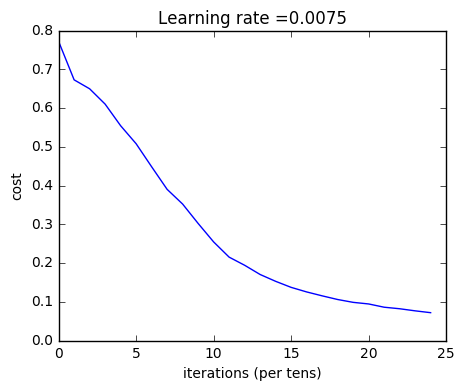

In [26]:
parameters = final_model(train_x, train_y, layer_dims = layers_dims, iterations = 2500, print_cost = True)

## Prediction

In [ ]:
def predict(X,y,parameters):
    m = X.shape[1]
    n = len(parameters) // 2
    p = np.zeros((1,m))
    
    probas, caches = L_model_forward(X, parameters)
    
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    print("Accuracy: "  + str(np.sum((p == y)/m)))
    
    return p